# Tupper's Self-Referential Formula Explained
---


## The formula

Tuppers self referential formula is the folowing:
$$
\frac{1}{2} < \left \lfloor{\mbox{mod} \left (\left \lfloor{\frac{y}{17}}\right \rfloor 2^{-17\lfloor x \rfloor - \mbox{mod}(\lfloor y \rfloor, 17)}, 2 \right )}\right \rfloor
$$

This may at first be a litle hard to understand so lets break it down into smaler parts.

The first part of the formula is a comparason  $\left (\frac{1}{2} < \mbox{ } ... \right )$ . This means that the whole expresion can be evaluated to either true or false.

Next we have the rest. Firstly the $ \lfloor \mbox{ } \rfloor $ are the floor function, which is a very glorified way of saying 'rounded down'. So an exampel would be $ \lfloor 3.6 \rfloor = 3 $. Secondly ther is the 'mod' function, which stands for modulo. This is a form of division, namely remainder division. This means that instead of takeing the quot between the two numbers you take the remainder, so $ \mbox{mod}(3,2) = 1$ because $ 3 / 2 = 1 \mbox{ with } 1 \mbox{ as the remainder} $. This means that the expression $ \left \lfloor{\mbox{mod} \left(\left \lfloor{\frac{y}{17}}\right \rfloor..., 2\right)} \right \rfloor $ will always be equal to either 1 or 0 since that is the only two remainders you can get if you devide by two.

Now for the rest of the formula. The rest is pretty much straight forward considering the previous explenation. But there are some comments that need to be made. Because we will be using this formula with very large y-values we want to avoid use of decimal numbers as much as possible. This means that we need to rewright the formula just a tiny bit. Lets start by focusing on the bad guy, $ 2^{-17\lfloor x \rfloor - \mbox{mod}(\lfloor y \rfloor, 17)} $. The exponent here can be expressed like $ -1(17\lfloor x \rfloor + \mbox{mod}(\lfloor y \rfloor, 17)) $. This means that it can all be expressed like $\frac{1}{2^{17\lfloor x \rfloor + \mbox{mod}(\lfloor y \rfloor, 17)}} $. This will result in a very nasty fraction wich we don't whant sice computers are not good with calculations involving decimal numbers. But luckely this can be solved. This is because of one simple rule: $ \left \lfloor \mbox{mod}(a, b) \right \rfloor = \mbox{mod}(\left \lfloor a \right \rfloor, b) $. Because of the way mod is calculated, $ \mbox{mod}(3.5, 2) = 1 + (\mbox{the decimal digets in 3.5 i.e. .5}) = 1.5$. This means that it dosen't matter weather you round the numerator before or after the calculation. And because the compleat formula states that the whole modulo expression should be rounded down ($ \left \lfloor{\mbox{mod} \left (\left \lfloor{\frac{y}{17}}\right \rfloor ...\right )}\right \rfloor $) then the rounding down can be made inside the expression itself. Therfore we can rewrite the whole expression as:

$$
\frac{1}{2} < \mbox{mod} \left ( \left \lfloor \frac{\left \lfloor y/17 \right \rfloor}{2^{17\lfloor x \rfloor + \mbox{mod}(\lfloor y \rfloor, 17)}} \right \rfloor,2 \right )
$$

Now that the formula is a bit more easily understandeble, for both humans and computers, the actual computing can start. Fist lests define a function wich will return either `True` or `False` depending on the reslut of the formula.

In python `%` denotes modulo so $\mbox{mod}(a, b)$ would be `a % b` in python. `//` is integer division which is the same as rounded down so $ \left \lfloor \frac{a}{b} \right \rfloor $ is the same as `a//b` in python. Double times is raised to and `int(...)` is floor.

In [1]:
def tuppers_form(x, y):
    res = ((y//17)//2**(17*int(x) + int(y) % 17)) % 2
    return 1/2 < res

Next if we want to fully experience the true power of this formula then we need to start from a very specific y-value. Namely the following 543-digit number. Let this number be called k.

In [2]:
k =  """960 939 379 918 958 884 971 672 962 127 852 754 715 004 339 660 129 306 651 505 519 271 702 802 395 266
424 689 642 842 174 350 718 121 267 153 782 770 623 355 993 237 280 874 144 307 891 325 963 941 337 723 487 857
735 749 823 926 629 715 517 173 716 995 165 232 890 538 221 612 403 238 855 866 184 013 235 585 136 048 828 693
337 902 491 454 229 288 667 081 096 184 496 091 705 183 454 067 827 731 551 705 405 381 627 380 967 602 565 625
016 981 482 083 418 783 163 849 115 590 225 610 003 652 351 370 343 874 461 848 378 737 238 198 224 849 863 465
033 159 410 054 974 700 593 138 339 226 497 249 461 751 545 728 366 702 369 745 461 014 655 997 933 798 537 483
143 786 841 806 593 422 227 898 388 722 980 000 748 404 719"""

I desided to leave the number as a string just so it's a little bit easier to see what the actual number is. But this also means that we need to convert the number from a string to a integer. This can be done by the following function that will remove all witespaces and newlines.

In [3]:
def str_to_int(str_k):
    return int(''.join(str_k.split()))

In [4]:
k = str_to_int(k)
k

960939379918958884971672962127852754715004339660129306651505519271702802395266424689642842174350718121267153782770623355993237280874144307891325963941337723487857735749823926629715517173716995165232890538221612403238855866184013235585136048828693337902491454229288667081096184496091705183454067827731551705405381627380967602565625016981482083418783163849115590225610003652351370343874461848378737238198224849863465033159410054974700593138339226497249461751545728366702369745461014655997933798537483143786841806593422227898388722980000748404719

Next we need a cordinate system to plot the reslut of our function. This will be done in a 17x106 big matrix (17 rows and 106 columns which means that the cordinate system that will represent this will be 106x17). For each cordinate which the function returns `True` the corosponding point in the matrix will be set to `1` and for each cordinate which returns `False` the matrix will have a `0`. This means that the matrix will inisially be filled with only zerose.

In [5]:
import numpy as np
bitmap = np.zeros((17, 106), dtype=np.int8) #creates a 17x106 big matrix filled with only zeroes
                                            #dtype specifies that we use integers in our matrix

Since we will be mixing cordinates from a cordinate system and points in the matrix we need a way of converting between them. The cordinate system which Tupper's formula uses is an inverted cordinate system meaning that the origin is in the top left corner if you have the positive plane infront of you. A matrix on the other hand is only "halv inverted", 0,0 is in the top left corner and therfore only the x-cordinates need to be inverted. Because the cordinate system is 106 wide and 0 is the first cordinate we need to subtract the x-cordinate from 105 to get the x-cordinate for our inverted cordinate system.

In [6]:
def convert_cord(x, y):
    real_x = 105 - x
    return (real_x, y)

Next we need to go through the whole 2D-array and determen for each point if it should be a 1 or a 0. To do this we need to know what the start value of the y-cordinate will be, the k-value. We will be using the number previously specified. Remeber that matrices are indext by `[row][column]` and the row is equivilent to the y-value and the column to the x-value.

In [7]:
def populate_array(array, k_val):
    for x in range(106):
        for y in range(17):
            plot_x, y = convert_cord(x,y)
            array[y][x] = 1 if tuppers_form(plot_x,k_val + y) else 0
    return array
bitmap = populate_array(bitmap, k)

Now there is only one thing remaining, to plot the matrix. Each 1 is represented by a black dot, and each 0 is represented by a white dot. Endjoy the result!

In [8]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15,15)

import matplotlib.pyplot as plt
plt.imshow(bitmap, cmap="Greys", interpolation='nearest')
plt.show()

Populating the interactive namespace from numpy and matplotlib


Do you see any simularities to the formula used to make this plot? If you forgoten the origional formula, then here is it again:

$$
\frac{1}{2} < \left \lfloor{\mbox{mod} \left (\left \lfloor{\frac{y}{17}}\right \rfloor 2^{-17\lfloor x \rfloor - \mbox{mod}(\lfloor y \rfloor, 17)}, 2 \right )}\right \rfloor
$$

---
## Other aplications

Well this is all well and good and not to mention cool, but has it any other practical use besides printing itself?
Good question! Well if it would just plot itself then it would only be cool, but this formula is awesome because it can plot anything that would fit into a 106x17 big space, you just need to find the right k-value. This is actualy a quite simple task for a computer. To do this you first need to convert the picture into a binary digit. Each black dot represents a 1 and each white dot represents a 0. You start in the botom left corner going throug each column ending in the top right corner.

In [9]:
def make_binary(bitmap):
    bin_num = []
    for x in range(106):
        for y in range(17):
            bin_num.append(str(bitmap[16-y][x]))
    return '0b' + ''.join(bin_num)

Now we are almoste done with how to extract a k-value from a given picture. Now the only thing left is to convert the binary number to decimal and then multiplying it with 17.

In [10]:
def make_k(bin_num):
    return int(bin_num, 2) * 17

def format_num(k):
    """
    Formats the number k for printing, inserting spaces and newlines making it more
    readeble.
    """
    str_k = str(k)
    r_str = ""
    for i, s in enumerate(str_k):
        if i%(93) == 0: #93 = 3*31
            r_str += "\n"
        elif i%3 == 0 and i != 0:
            r_str += " "
        r_str += s
    return r_str

k = make_k(make_binary(bitmap))
print(format_num(k))


960 939 379 918 958 884 971 672 962 127 852 754 715 004 339 660 129 306 651 505 519 271 702 802 395 266 424 689 642 842 174
350 718 121 267 153 782 770 623 355 993 237 280 874 144 307 891 325 963 941 337 723 487 857 735 749 823 926 629 715 517 173
716 995 165 232 890 538 221 612 403 238 855 866 184 013 235 585 136 048 828 693 337 902 491 454 229 288 667 081 096 184 496
091 705 183 454 067 827 731 551 705 405 381 627 380 967 602 565 625 016 981 482 083 418 783 163 849 115 590 225 610 003 652
351 370 343 874 461 848 378 737 238 198 224 849 863 465 033 159 410 054 974 700 593 138 339 226 497 249 461 751 545 728 366
702 369 745 461 014 655 997 933 798 537 483 143 786 841 806 593 422 227 898 388 722 980 000 748 404 719


If you compare this number with the previous number used to make the plot, you'll find that they are in fact identical. But to prove that I'm not lying and that this formula can plot any picture, I've made my own k-value to prove that I'm correct. So lets go through all the steps ones again, but this time with a different k-value. Hold on:

In [11]:
new_k = """55 934 033 584 720 390 206 882 320 468 305 421 219 844 684 479 331 002 970 075 821 753 721 508 932 938 378 426
  305 732 273 377 902 367 876 078 444 743 079 996 747 893 761 823 744 136 101 472 009 779 703 095 635 758 257 782 377 860
  941 018 333 003 621 269 391 420 268 121 647 984 814 549 246 237 633 768 392 605 966 459 352 428 070 521 292 433 908 174
  328 096 991 265 331 362 623 693 050 131 072 503 023 279 591 720 661 066 461 166 704 440 478 493 984 309 914 632 585 085
  359 505 006 747 633 324 442 737 053 713 100 406 271 938 079 771 676 167 164 492 120 482 081 422 603 293 578 052 465 247
  571 858 071 853 331 471 731 840 454 839 659 582 545 331 147 938 569 523 270 772 546 398 205 855 843 518 436 698 226 688"""

In [12]:
new_bitmap = np.zeros((17,106))

In [13]:
new_bitmap = populate_array(new_bitmap, str_to_int(new_k))

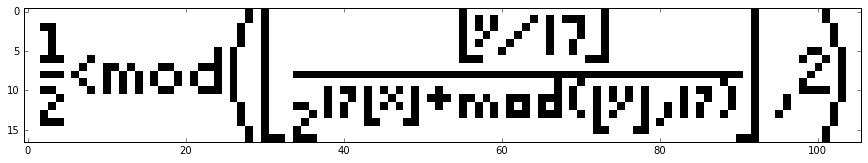

In [14]:
plt.imshow(new_bitmap, cmap="Greys", interpolation="nearest")
plt.show()

Recognize this formula? It's the slightly rewriten vertion of the formula that we made. It may not be as pritty as the original plot, but that is one more proof that it's hand made by me and may therefore contain some inperfections.

If you wish to make your own plots, then you can use [this site](http://tuppers-formula.tk/) to make your own plots. Althoug you need flip both horizontaly and verticaly to make it compadable with the real formula. 